# Problem 0: Figure Critique

<img src="PS.png" style="width: 500px" align="left"/>

The figure above (Parsons et al., 2014) shows a power spectrum, which is a standard plot in cosmology. The particular power spectrum above shows the brightness of the 21cm signal (signal from neutral hydrogen) on the y-axis, as a function of k-scale (large k's are small spatial scales). For observational experiments studying the Epoch of Reionization (EoR), the power spectrum is a way of encoding Intergalactic Medium (IGM) fluctuations in the early Universe when the first stars and galaxies ionized the IGM. Several experiments are working on detecting the EoR, but there are many things that can overshadow the signal - the power spectra currently published in the field reveal the sensitivities of various experiments and can be used to place upper limits on the signal; in the future, power spectrum detections of the signal will be used to study many aspects of our cosmic dawn.

The main things to focus on in the plot are: the black data points (with error bars), the dashed cyan line (theoretical noise level), and the magenta curve (model of the EoR signal). The main story that the plot is trying to tell is that the data points are consistent with noise, lower than previous limits (the yellow triangles) by a couple orders of magnitude, but still well above the predicted EoR signal. The detections vs. non-detections are also interesting.

Things that I think the plot does well are: the dotted grid background, the log y-axis, the different symbols, and the color contrasts (black, yellow, cyan, magenta). 

In order to improve the plot, I would remove the data points inside the dashed black 'horizon limit,' since measurements aren't intended to be made in that region of k-space (data is thrown away in that region). I would also align the range of the y-axes in both panels (they are two different representations of the power spectrum - with different units). The axes labels' fontsize is a bit too small, and there could be more wspace between the two panels. I would also change the dashed cyan curve to a different color completely, so that it's not confused with the solid cyan line (they're fundamentally two different things). The yellow markers are interesting, but could be removed to make a less-crowded plot (and then plotted on a separate plot that could, for example, compare the best results from various experiments all on one plot).  



# Problem 1: Reproducing Personal Figure with Bokeh

Original figure (jack-knife tests):

<img src="null_zoom.png" style="width: 500px" align="left"/>

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import Title
output_notebook() # output in notebook


# Load data
bls = np.load('baselines.npz')
lst = np.load('lst.npz')
evenodd = np.load('evenodd.npz')
lst_errs_x, lst_errs_y = [], []
bls_errs_x, bls_errs_y = [], []
evenodd_errs_x, evenodd_errs_y = [], []
for ee,err in enumerate(lst['pCv_err']):
    lst_errs_x.append((lst['kpl'][ee]+0.01,lst['kpl'][ee]+0.01))
    lst_errs_y.append((lst['pCv'][ee]-2*err,lst['pCv'][ee]+2*err))
for ee,err in enumerate(bls['pCv_err']):
    bls_errs_x.append((bls['kpl'][ee]+0.005,bls['kpl'][ee]+0.005))
    bls_errs_y.append((bls['pCv'][ee]-2*err,bls['pCv'][ee]+2*err))
for ee,err in enumerate(evenodd['pCv_err']):
    evenodd_errs_x.append((evenodd['kpl'][ee],evenodd['kpl'][ee]))
    evenodd_errs_y.append((evenodd['pCv'][ee]-2*err,evenodd['pCv'][ee]+2*err))
noise = 4436767.36822 

# Plot set-up
TOOLS="hover,crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"
p = figure(tools=TOOLS, toolbar_location="above", \
           plot_width=600, plot_height=400, x_range=[-0.6,0.6], y_range=[-1e8,2e8])

# Plot points and errors
p.circle(bls['kpl']+0.005, bls['pCv'], color='green', size=5, legend='Baselines Null Test', muted_alpha=0)
p.multi_line(bls_errs_x, bls_errs_y, color='green')
p.circle(lst['kpl']+0.01, lst['pCv'], color='magenta', size=5, legend='LST Null Test', muted_alpha=0)
p.multi_line(lst_errs_x, lst_errs_y, color='magenta')
p.circle(evenodd['kpl'], evenodd['pCv'], color='blue', size=5, legend='Even/Odd Null Test', muted_alpha=0)
p.multi_line(evenodd_errs_x, evenodd_errs_y, color='blue')

# Additional plotting
p.multi_line([(-0.6,0.6)],[(0,0)], color='black', line_width=2, line_dash='dashed') # dashed black line
p.quad(top=[noise], bottom=[-noise], left=[-0.6], right=[0.6], color="black", alpha=0.3) # grey noise region
p.add_layout(Title(text='k_parallel', align="center"), "below") # LaTeX not yet supported in Bokeh
p.add_layout(Title(text="P(k)", align="center"), "left")
p.legend.location = "top_left"
p.legend.click_policy="mute" # can hide the points if legend is clicked, but can't hide error bars at the same time...
show(p)


Loading BokehJS ...

# Problem 2: Reproducing Stocks Figure

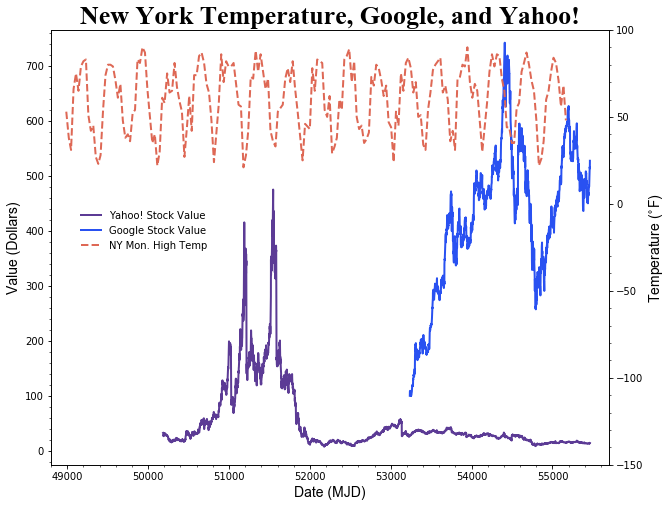

In [119]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Load data
google = pd.read_csv('google_data.txt',delimiter='\t',index_col=0)
temps = pd.read_csv('ny_temps.txt',delimiter='\t',index_col=0)
yahoo = pd.read_csv('yahoo_data.txt',delimiter='\t',index_col=0)
x_google = google.index
y_google = google["Stock Value"]
x_temps = temps.index
y_temps = temps["Max Temperature"]
x_yahoo = yahoo.index
y_yahoo = yahoo["Stock Value"]

# Plot
f, ax = plt.subplots(figsize=(10,8))
ax.plot(x_yahoo,y_yahoo, color='#5C3B95', linewidth=2, label='Yahoo! Stock Value')
ax.plot(x_google,y_google, color='#2951F1', linewidth=2, label='Google Stock Value')
ax2 = ax.twinx()
ax2.plot(x_temps,y_temps, color='#DE6855', linewidth=2, linestyle='--', label='NY Mon. High Temp')
ax2.set_ylim(-150,100)
ax2.set_ylabel("Temperature ($^{\circ}$F)", fontdict={'fontsize':14, 'fontname':'Arial'})
minorLocator = MultipleLocator(10)
ax2.yaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(200)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(20)
ax.yaxis.set_minor_locator(minorLocator)
ax.set_xlabel("Date (MJD)", fontdict={'fontsize':14, 'fontname':'Arial'})
ax.set_ylabel("Value (Dollars)", fontdict={'fontsize':14, 'fontname':'Arial'})
ax.set_ylim(-25,765)
ax.set_xlim(48800,55700)
ax.set_title("New York Temperature, Google, and Yahoo!", fontdict={'fontsize':26, 'fontweight':'bold', 'fontname':'Times New Roman'})
f.legend(loc=6, frameon=False, bbox_to_anchor=(0.1, 0.48))